<a href="https://colab.research.google.com/github/vvardhan11/Info5731/blob/main/Sentiment_Analysis_for_NBAFinals_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Collection

In [ ]:
#import tweepy
#from tweepy import OAuthHandler
#from textblob import TextBlob

In [ ]:
#pip install snscrape

In [ ]:
#import snscrape.modules.twitter as sntwitter
#import pandas as pd
#query = "(nba OR boston OR celtics OR nbafinals OR nbafinals2022) -warriors (#NBAFinals2022 OR #celtics OR #bostonceltics OR #Nba) until:2022-06-18 since:2022-06-01 -filter:links -filter:replies"
#tweets = []
#limit = 100000


#for tweet in sntwitter.TwitterSearchScraper(query).get_items():
#    if len(tweets) == limit:
#        break
#    else:
#        tweets.append([tweet.date, tweet.username, tweet.content])
        
#df_celtics = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])

In [ ]:
#from google.colab import files
#df_celtics.to_csv('celtics.csv', encoding = 'utf-8-sig')
#files.download('celtics.csv')

In [ ]:
#query = "(NBAFinals2022 OR warriors OR gsw OR goldenstatewarriors OR nba) -celtics (#NBAFinals2022 OR #gsw OR #goldenstatewarriors OR #nbafinals) until:2022-06-20 since:2022-06-01 -filter:links -filter:replies"
#tweets = []
#limit = 100000


#for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    # print(vars(tweet))
    # break
#    if len(tweets) == limit:
#        break
#    else:
#        tweets.append([tweet.date, tweet.username, tweet.content])
        
#df_warriors = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet'])

In [ ]:
#df_warriors.to_csv('warriors.csv', encoding = 'utf-8-sig')
#files.download('warriors.csv')

In [69]:
from google.colab import files
uploaded = files.upload()

Saving warriors.csv to warriors (2).csv
Saving celtics.csv to celtics (2).csv


In [70]:
import pandas as pd   
Celtics = pd.read_csv('celtics.csv')
Warriors = pd.read_csv('warriors.csv')

#Data Pre-processing


#Converting to Lower case

In [71]:
Celtics['Tweet'] = Celtics['Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Warriors['Tweet'] = Warriors['Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Warriors['Tweet'].head()

0    over the past couple of days i’ve noticed that...
1    jonathan kuminga's time is coming and he's tak...
2           what time the game come on? #nbafinals2022
3    jordon poole went from g league last season - ...
4    would d rose would have won a ring on the bull...
Name: Tweet, dtype: object

We can see that all the tweet text has been converted into lower case letter for better preprocessing of data.

#Removing Punctuation


In [72]:
Celtics['Tweet'] = Celtics['Tweet'].str.replace('[^\w\s]','')
Warriors['Tweet'] = Warriors['Tweet'].str.replace('[^\w\s]','')
Warriors['Tweet'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


0    over the past couple of days ive noticed that ...
1    jonathan kumingas time is coming and hes takin...
2             what time the game come on nbafinals2022
3    jordon poole went from g league last season  n...
4    would d rose would have won a ring on the bull...
Name: Tweet, dtype: object

As you can see in the above output, all the punctuation, including ‘#’ and ‘@’, has been removed from the training data.

#Removal of Stop Words


In [73]:
import nltk
nltk.download('all')

from pandas.io.formats.info import DataFrameInfoPrinter
from nltk.corpus import stopwords
stop = stopwords.words('english')
Celtics['Tweet'] = Celtics['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Warriors['Tweet'] = Warriors['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Warriors['Tweet'].head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

0    past couple days ive noticed lot steph curry f...
1    jonathan kumingas time coming hes taking names...
2                         time game come nbafinals2022
3    jordon poole went g league last season nba cha...
4    would rose would ring bulls never got injured ...
Name: Tweet, dtype: object

As we discussed earlier, stop words (or commonly occurring words) should be removed from the text data. For this purpose, we can either create a list of stopwords ourselves or we can use predefined libraries.

#Common word removal

In [74]:
freq = pd.DataFrame(' '.join(Celtics['Tweet']).split()).value_counts()[:10]
freq1 = pd.DataFrame(' '.join(Warriors['Tweet']).split()).value_counts()[:10]
freq1

nbafinals        28435
warriors         21855
nbafinals2022    21539
nba              12386
game              7831
curry             5794
gsw               4838
de                4750
dubnation         4444
boston            3585
dtype: int64

In [75]:
freq = list(freq.index)
Celtics['Tweet'] = Celtics['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
freq1 = list(freq1.index)
Warriors['Tweet'] = Warriors['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
Warriors['Tweet'].head()

0    past couple days ive noticed lot steph curry f...
1    jonathan kumingas time coming hes taking names...
2                         time game come nbafinals2022
3    jordon poole went g league last season nba cha...
4    would rose would ring bulls never got injured ...
Name: Tweet, dtype: object

# Rare words removal


In [76]:
freq = pd.DataFrame(' '.join(Celtics['Tweet']).split()).value_counts()[-10:]
freq1 = pd.DataFrame(' '.join(Warriors['Tweet']).split()).value_counts()[-10:]
freq1

hurray             1
hur                1
hunty              1
hunt               1
hunnid             1
hunna              1
hungryforthewin    1
hundreds           1
hundred            1
𝟱𝟬                 1
dtype: int64

In [77]:
freq = list(freq.index)
Celtics['Tweet'] = Celtics['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
freq1 = list(freq1.index)
Warriors['Tweet'] = Warriors['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq1))
Warriors['Tweet'].head()

0    past couple days ive noticed lot steph curry f...
1    jonathan kumingas time coming hes taking names...
2                         time game come nbafinals2022
3    jordon poole went g league last season nba cha...
4    would rose would ring bulls never got injured ...
Name: Tweet, dtype: object

All these pre-processing steps are essential and help us in reducing our vocabulary clutter so that the features produced in the end are more effective.

# Spelling correction

We’ve all seen tweets with a plethora of spelling mistakes. Our timelines are often filled with hastly sent tweets that are barely legible at times.

In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words. For example, “Analytics” and “analytcs” will be treated as different words even if they are used in the same sense.

In [78]:
from textblob import TextBlob
Celtics['Tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))
Warriors['Tweet'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    past couple days give noticed lot steps carry ...
1    jonathan kumingas time coming he taking names ...
2                         time game come nbafinals2022
3    gordon pool went g league last season na champ...
4    would rose would ring balls never got injured ...
Name: Tweet, dtype: object

# Tokenization
Tokenization refers to dividing the text into a sequence of words or sentences. In our example, we have used the textblob library to first transform our tweets into a blob and then converted them into a series of words.

In [79]:
import nltk
nltk.download('punkt')
TextBlob(Celtics['Tweet'][1]).words
TextBlob(Warriors['Tweet'][1]).words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


WordList(['jonathan', 'kumingas', 'time', 'coming', 'hes', 'taking', 'names', 'plans', 'posterize', 'future', 'salty', 'critics', 'take', 'note', 'warriors', 'gsw', 'nba'])

# Stemming
Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use PorterStemmer from the NLTK library.

In the following example, dysfunctional has been transformed into dysfunct, among other changes.

In [80]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
Celtics['Tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
Warriors['Tweet'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    past coupl day ive notic lot steph curri fan l...
1    jonathan kuminga time come he take name plan p...
2                         time game come nbafinals2022
3    jordon pool went g leagu last season nba champ...
4    would rose would ring bull never got injur hon...
Name: Tweet, dtype: object

# Lemmatization
Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [81]:
from textblob import Word
import nltk
nltk.download('wordnet')

Celtics['Tweet'] = Celtics['Tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
Warriors['Tweet'] = Warriors['Tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
Warriors['Tweet'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    past couple day ive noticed lot steph curry fa...
1    jonathan kumingas time coming he taking name p...
2                         time game come nbafinals2022
3    jordon poole went g league last season nba cha...
4    would rose would ring bull never got injured h...
Name: Tweet, dtype: object

#Sentiment Analysis

If you recall, our problem was to detect the sentiment of the tweet. So, before applying any ML/DL models (which can have a separate feature detecting the sentiment using the textblob library), let’s check the sentiment of the first few tweets.


In [82]:
Celtics['Tweet'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                    (0.0, 0.0)
1                    (0.41666666666666663, 0.8)
2                                    (0.0, 0.0)
3    (0.13636363636363635, 0.45454545454545453)
4                                    (0.0, 0.0)
Name: Tweet, dtype: object

In [83]:
Warriors['Tweet'][:5].apply(lambda x: TextBlob(x).sentiment)

0                 (0.375, 0.275)
1                   (0.0, 0.125)
2                    (-0.4, 0.4)
3      (0.0, 0.5222222222222223)
4    (0.39999999999999997, 0.65)
Name: Tweet, dtype: object

Above, you can see that it returns a tuple representing polarity and subjectivity of each tweet. Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. This can also work as a feature for building a machine learning model.

In [84]:
Celtics['sentiment'] = Celtics['Tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
Celtics[['Tweet','sentiment']].head()

,Tweet,sentiment
0,nbafinals2022 stanleycup tmrw peakyblinders ti...,0.000000
1,like shannonsharpe love kd respect tremendousl...,0.416667
2,coming home nba champion guy goldblooded nba75...,0.000000
3,nba offseason anyone know new ben simmons jump...,0.136364
4,know u 90 baby got attachment ai yall feeling ...,0.000000


In [85]:
Celtics['Date'] = Celtics['Date'].astype('datetime64[ns]')
Celtics['Date'] = Celtics['Date'].dt.date
Celtics.rename(columns = {'sentiment':'sentiment for celtics'}, inplace = True)
Celtics['Date'] = Celtics['Date'].astype('datetime64[ns]')
df=Celtics[['Date','sentiment for celtics']]
s=df.groupby(pd.Grouper(key="Date",freq='1D')).mean()
s

,sentiment for celtics
Date,
2022-06-01,0.062490
2022-06-02,0.039862
2022-06-03,0.040237
2022-06-04,0.028933
2022-06-05,0.033073
2022-06-06,-0.007120
2022-06-07,0.052439
2022-06-08,0.052192
2022-06-09,0.044947


In [89]:
Warriors['sentiment'] = Warriors['Tweet'].apply(lambda x: TextBlob(x).sentiment[0] )
Warriors[['Tweet','sentiment']].head()

,Tweet,sentiment
0,past couple day ive noticed lot steph curry fa...,0.375
1,jonathan kumingas time coming he taking name p...,0.000
2,time game come nbafinals2022,-0.400
3,jordon poole went g league last season nba cha...,0.000
4,would rose would ring bull never got injured h...,0.400


In [93]:
Warriors['Date'] = Warriors['Date'].astype('datetime64[ns]')
Warriors['Date'] = Warriors['Date'].dt.date
Warriors.rename(columns = {'sentiment':'sentiment for Warriors'}, inplace = True)
Warriors['Date'] = Warriors['Date'].astype('datetime64[ns]')
df1=Warriors[['Date','sentiment for Warriors']]
p=df1.groupby(pd.Grouper(key="Date",freq='1D')).mean()
p

,sentiment for Warriors
Date,
2022-06-01,0.092225
2022-06-02,0.031195
2022-06-03,0.025004
2022-06-04,-0.005491
2022-06-05,0.009738
2022-06-06,0.013550
2022-06-07,-0.014807
2022-06-08,0.012394
2022-06-09,0.004461


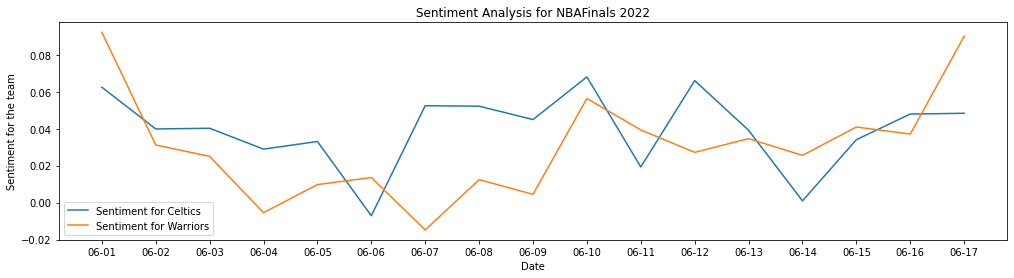

In [98]:
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = ['06-01','06-02','06-03','06-04','06-05','06-06','06-07','06-08','06-09','06-10','06-11','06-12','06-13','06-14','06-15','06-16','06-17']
y = s['sentiment for celtics']
z = p['sentiment for Warriors'][:17]
  
# plot lines
plt.figure(figsize=(17,4))
plt.plot(x, y, label = "Sentiment for Celtics", linestyle="-")
plt.plot(x, z, label = "Sentiment for Warriors", linestyle="-")
plt.legend()
plt.xticks(x)
plt.xlabel("Date")
plt.ylabel("Sentiment for the team")
plt.title("Sentiment Analysis for NBAFinals 2022")
plt.show()